In [433]:
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import numpy as np
import nltk
import re
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from unidecode import unidecode
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

with open('data.txt', 'r') as file:
    # Read the entire contents of the file
    # Read lines from the file and remove leading/trailing whitespaces
    lines = [line.strip() for line in file.readlines()]

# Filter out empty lines
non_empty_lines = [line for line in lines if line]
#print(non_empty_lines.shape)
array_of_sentences = np.array(non_empty_lines)
# Contains 192 sentences
array_of_sentences.shape

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kentonlarsson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kentonlarsson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(192,)

In [434]:
# document preprocessing

stop_words = set(stopwords.words('english')) # Does not contain same stop words as in the book, may effect result.
#stop_words.update(set(str(i) for i in range(10)))  # Add digits to the set of stop words
#print(stop_words)
# Add stopwords manually
#stop_words.extend(['2000', '11','2', '13', '4','5', '6', '17','8', '19']) #TODO fixa så nummer inte kmr med, se till a göra toString innan?
#print(stop_words)

stemmer = SnowballStemmer("english", ignore_stopwords=True)

# Store final preprocessed data set in 'corpus'
corpus = [] 

for sentence in array_of_sentences:

    # Remove non-alphabetic characters and numbers
    sentence = re.sub(r'[^a-zA-Z\s]', '', sentence)

    # Tokenize the sentence into words
    words = sentence.split()

    # Remove stopwords and apply stemming to each word
    processed_words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]

    # Join the processed words to form the processed sentence
    processed_sentence = ' '.join(processed_words)

    # Append the processed sentence to the list
    corpus.append(processed_sentence)

# Convert the processed list to a NumPy array
array_corpus = np.array(corpus)

# 'array_corpus' is a NumPy array containing processed sentences
print(array_corpus.shape)

(192,)


In [435]:
# Initialize the TfidfVectorizer with appropriate options
vectorizer = TfidfVectorizer()

# Fit and transform the processed sentences to obtain the sparse TF-IDF matrix (This is our matrix A)
tfidf_matrix = vectorizer.fit_transform(array_corpus)

print(tfidf_matrix.shape)

# Convert the TF-IDF matrix to a dense NumPy array (notcused)
dense_tfidf_matrix = tfidf_matrix.toarray()


(192, 486)


In [436]:


# perform SVD on the sparse matrix A (tfidf_matrix)
# k denotes the number of singular values and singular vectors to compute.
k = 10
u, s, v = svds(tfidf_matrix, k) 

print(u)

# Extract the most important sentences and terms
most_important_terms_indices = np.argsort(u[-1, :])[-k:][::-1]
most_important_sentences_indices = np.argsort(v[:, -1])[-k:][::-1]

# Get the actual sentences and terms
most_important_sentences = [array_of_sentences[i] for i in most_important_sentences_indices]
most_important_terms = [vectorizer.get_feature_names_out()[i] for i in most_important_terms_indices]

# Print the results
print("Top k most important sentences:")
for sentence in most_important_sentences:
    print(sentence)

print("\nTop k most important terms:")
for term in most_important_terms:
    print(term)



[[-0.106713    0.02960144 -0.10514244 ...  0.04449688 -0.23483242
   0.09099368]
 [-0.045916    0.00733218 -0.14450807 ...  0.00681528 -0.11596076
   0.05612738]
 [ 0.09199378  0.02226201 -0.01886178 ... -0.03142384 -0.08043091
   0.04646935]
 ...
 [ 0.0022665  -0.02442914 -0.00366048 ... -0.02167316 -0.01733927
   0.01205616]
 [ 0.06483832  0.00524644 -0.06400595 ... -0.03167356 -0.01407061
   0.01405361]
 [ 0.01812691 -0.02788415 -0.04358403 ... -0.09116277 -0.02847777
   0.03764642]]
Top k most important sentences:
We will see that this self-referencing statement can be formulated mathematically as an eigenvalue equation for a certain matrix.
Clearly Google used an algorithm for ranking all the Web pages that agrees rather well with a common-sense quality measure.
When one uses a Web search engine it is typical that the search phrase is underspecified.
Therefore, some measure of quality is needed to filter out pages that are assumed to be less interesting.
The total number of Web pa

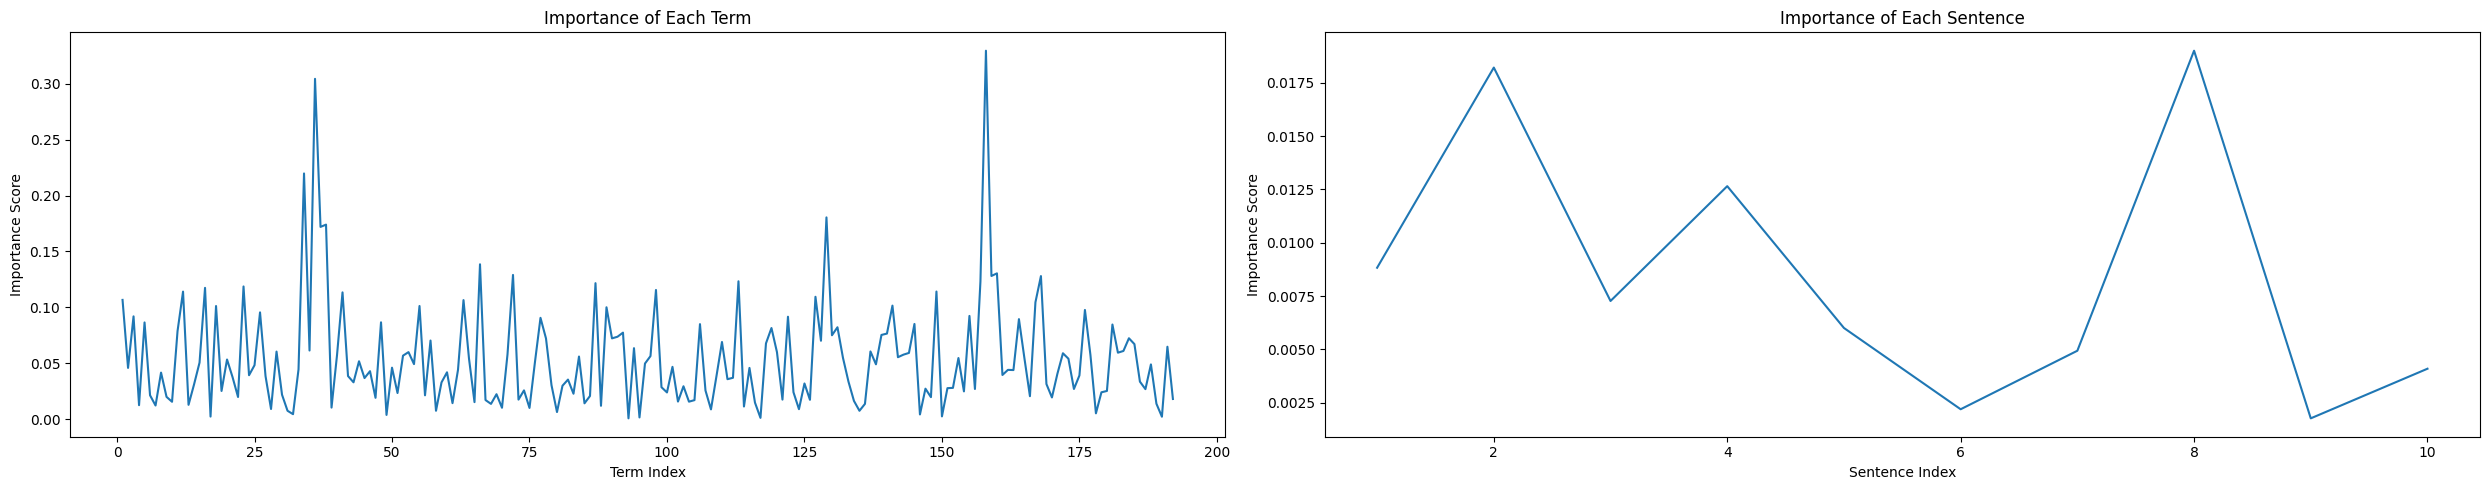

In [437]:


# Plot the importance of each term
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(u) + 1), np.abs(u[:, 0]))
plt.title('Importance of Each Term')
plt.xlabel('Term Index')
plt.ylabel('Importance Score')

# Plot the importance of each sentence
plt.subplot(1, 2, 2)
plt.plot(range(1, len(v) + 1), np.abs(v[:, 0]))
plt.title('Importance of Each Sentence')
plt.xlabel('Sentence Index')
plt.ylabel('Importance Score')

plt.tight_layout()
plt.show()